# Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

- Apply dimensionality reduction techniques to visualize the observations.
- Apply clustering techniques to group together similar observations.

# Introduction
- I chose the 2015 Boston Marathon finisher datatest for this unsupervised learning challenge.
- The motivation is to help the organizer figure out how to seperate the participants into proper division, so that the participants can have better marathon running experience. i.e. prepare refreshment for runners at the half way, since not everybody reach at the same time, optimize when and how much refreshment ready for the runners.
- Many times, runner speed is mainly taken into account when seperate them into different divisions, as well as genders and ages. This challenge would study a good way to seperate runners into divisions.

### Load data and data cleaning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/rojour/boston-results#marathon_results_2015.csv
df_original = pd.read_csv('./boston-results/marathon_results_2015.csv')

# df = pd.read_csv('./bostonmarathon-master/results/2013/results.csv')

In [3]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_original.head(20)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
5,5,9,"Chepkwony, Frankline",30,M,Koibatek,NaN,KEN,NaN,NaN,0:14:44,0:29:45,0:44:59,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:18,0:05:00,-,2:10:52,6,6,6
6,6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,NaN,NaN,0:14:45,0:29:45,0:45:20,1:00:43,1:04:03,1:16:05,1:31:59,1:48:06,2:04:05,0:05:01,-,2:11:20,7,7,7
7,7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,NaN,NaN,0:14:44,0:29:44,0:44:59,1:00:30,1:04:02,1:16:07,1:31:59,1:47:59,2:04:58,0:05:04,-,2:12:42,8,8,8
8,8,5,"Tola, Tadese",27,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:02,1:16:07,1:32:00,1:48:00,2:04:39,0:05:06,-,2:13:35,9,9,9
9,9,16,"Shafar, Vitaliy",33,M,Lutsk,NaN,UKR,NaN,NaN,0:15:14,0:30:34,0:46:05,1:01:43,1:05:07,1:17:18,1:33:11,1:49:43,2:06:16,0:05:07,-,2:13:52,10,10,10


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     26598 non-null  int64 
 1   Bib            26598 non-null  object
 2   Name           26598 non-null  object
 3   Age            26598 non-null  int64 
 4   M/F            26598 non-null  object
 5   City           26598 non-null  object
 6   State          24047 non-null  object
 7   Country        26598 non-null  object
 8   Citizen        1064 non-null   object
 9   Unnamed: 9     67 non-null     object
 10  5K             26598 non-null  object
 11  10K            26598 non-null  object
 12  15K            26598 non-null  object
 13  20K            26598 non-null  object
 14  Half           26598 non-null  object
 15  25K            26598 non-null  object
 16  30K            26598 non-null  object
 17  35K            26598 non-null  object
 18  40K            26598 non-n

### fast data cleaning 
- drop trash data
- rename column name (lower case, space to underscore)

In [5]:
df = df_original[['Bib', 'Name', 'Age', 'M/F', 'City', 'Country',  '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]
# lower case
df.columns = map(str.lower, df.columns)
# white space
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bib            26598 non-null  object
 1   name           26598 non-null  object
 2   age            26598 non-null  int64 
 3   m/f            26598 non-null  object
 4   city           26598 non-null  object
 5   country        26598 non-null  object
 6   5k             26598 non-null  object
 7   10k            26598 non-null  object
 8   15k            26598 non-null  object
 9   20k            26598 non-null  object
 10  half           26598 non-null  object
 11  25k            26598 non-null  object
 12  30k            26598 non-null  object
 13  35k            26598 non-null  object
 14  40k            26598 non-null  object
 15  pace           26598 non-null  object
 16  official_time  26598 non-null  object
dtypes: int64(1), object(16)
memory usage: 3.4+ MB


In [6]:
# transfer timedelta to seconds
for col in ['5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'pace', 'official_time']:
    df[str(col+"_sec")] = pd.to_timedelta(df[col]).dt.total_seconds()

# df['5k']

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bib                26598 non-null  object 
 1   name               26598 non-null  object 
 2   age                26598 non-null  int64  
 3   m/f                26598 non-null  object 
 4   city               26598 non-null  object 
 5   country            26598 non-null  object 
 6   5k                 26598 non-null  object 
 7   10k                26598 non-null  object 
 8   15k                26598 non-null  object 
 9   20k                26598 non-null  object 
 10  half               26598 non-null  object 
 11  25k                26598 non-null  object 
 12  30k                26598 non-null  object 
 13  35k                26598 non-null  object 
 14  40k                26598 non-null  object 
 15  pace               26598 non-null  object 
 16  official_time      265

In [179]:
df_dummy = pd.get_dummies(df['m/f'], drop_first=True)
# df_dummy

In [134]:
df_cluster = df[['age','5k_sec', '10k_sec', '15k_sec', '20k_sec', 
                 'half_sec', '25k_sec', '30k_sec', '35k_sec', '40k_sec', 'pace_sec', 'official_time_sec']]
df_cluster = pd.concat([df_cluster, df_dummy], axis=1)

In [136]:
df_cluster

,age,5k_sec,10k_sec,15k_sec,20k_sec,half_sec,25k_sec,30k_sec,35k_sec,40k_sec,pace_sec,official_time_sec,M
0,25,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7359.0,296.0,7757.0,1
1,30,883.0,1783.0,2698.0,3628.0,3841.0,4567.0,5519.0,6479.0,7362.0,298.0,7788.0,1
2,29,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7381.0,299.0,7822.0,1
3,28,883.0,1784.0,2701.0,3629.0,3842.0,4567.0,5520.0,6483.0,7427.0,300.0,7847.0,1
4,32,883.0,1784.0,2698.0,3628.0,3841.0,4567.0,5520.0,6479.0,7407.0,300.0,7849.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,64,3015.0,6211.0,9413.0,12746.0,13426.0,15953.0,19184.0,22639.0,26014.0,1051.0,27536.0,0
26594,61,2916.0,5979.0,9553.0,12958.0,13675.0,16364.0,19918.0,23336.0,26779.0,1079.0,28290.0,0
26595,66,3183.0,6436.0,9705.0,13027.0,13701.0,16431.0,20336.0,23931.0,27378.0,1098.0,28773.0,0
26596,53,2944.0,6012.0,9211.0,12701.0,13415.0,16160.0,19871.0,23615.0,27338.0,1100.0,28837.0,1


# Part I-dimensionality reduction techniques to visualize the observations

### PCA

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster)

# X_pca = PCA(n_components=2).fit_transform(X_std)


pca_components = PCA(n_components=2).fit_transform(X_std)

# pca_components = pca.fit_transform(X)

print(X_std.shape)


(26598, 13)


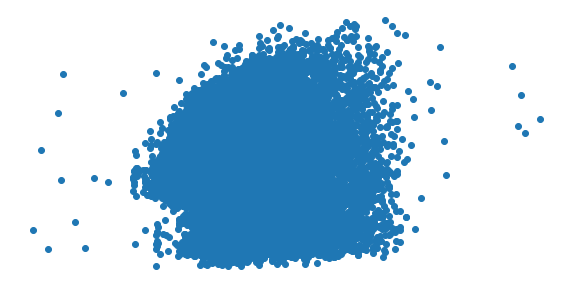

In [138]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
# for i in range(pca_components.shape[0]):
#     plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
#              color=colours[int(y[i])],
#              fontdict={'weight': 'bold', 'size': 100}
#         )
plt.scatter(pca_components[:, 0], pca_components[:, 1])

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### UMAP

In [139]:
import umap

# time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\An

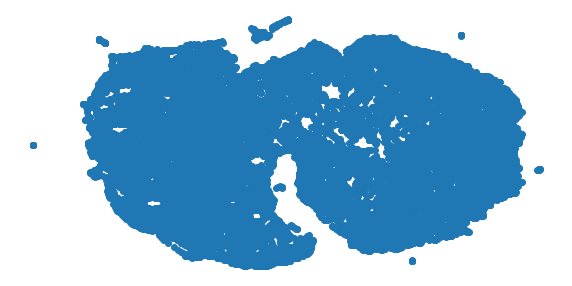

In [140]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### tuning UMAP hyperparameters

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4321 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to

n_neighbour = 2


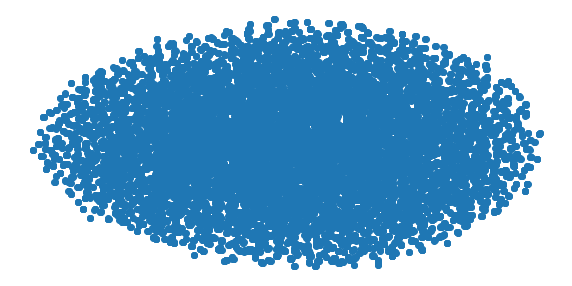

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 136 separate connected components using meta-embedding (experimental)
  n_components


n_neighbour = 3


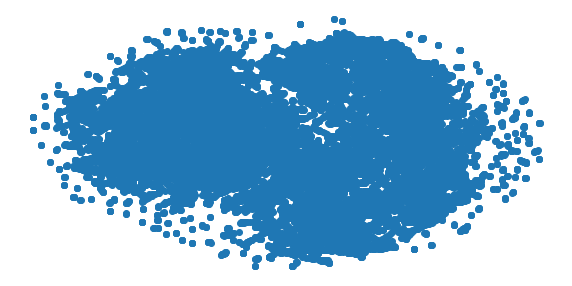

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 9 separate connected components using meta-embedding (experimental)
  n_components


n_neighbour = 4


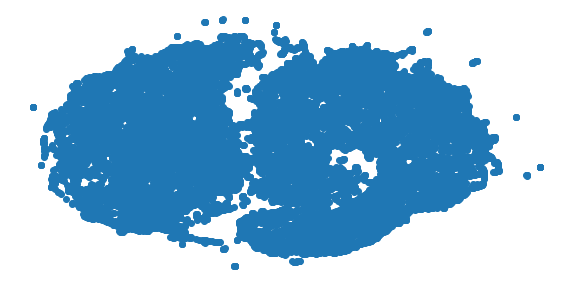

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


n_neighbour = 5


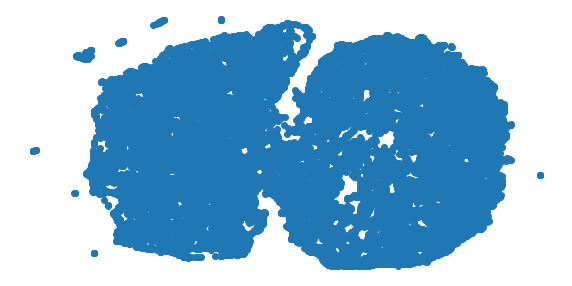

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


n_neighbour = 6


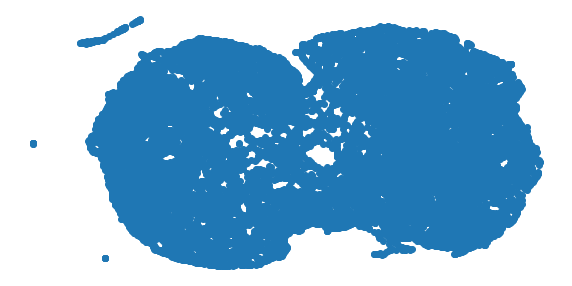

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


n_neighbour = 7


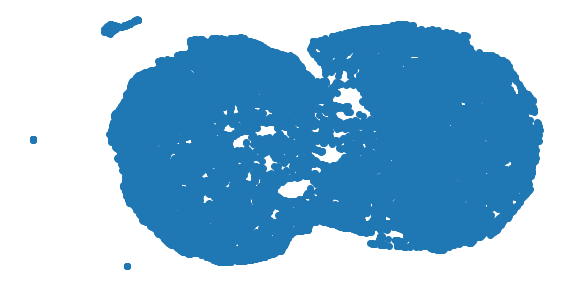

In [141]:
for n_neightbour in range(2, 8):
    umap_results = umap.UMAP(n_neighbors=n_neightbour,
                          min_dist=0.3,
                          metric='correlation').fit_transform(X_std)

    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    print("n_neighbour = {}".format(n_neightbour))
    plt.show()

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


min_dist = 0.01


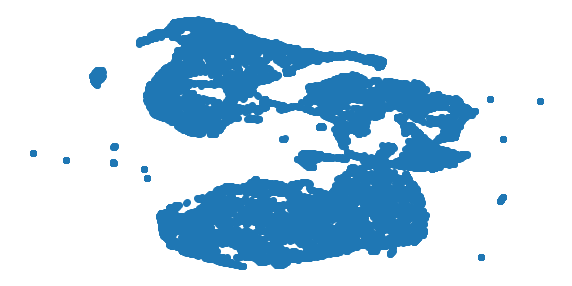

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


min_dist = 0.02


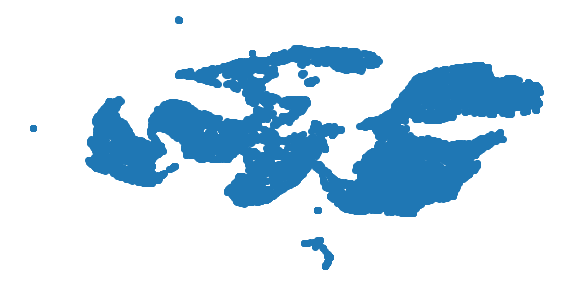

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


min_dist = 0.05


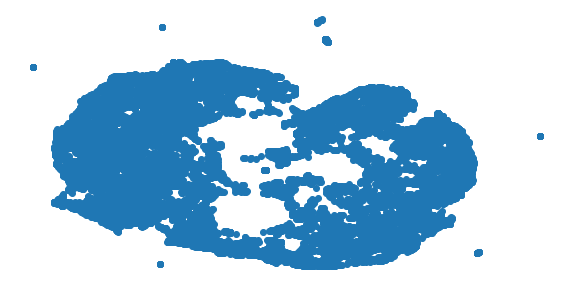

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\thinkful\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


min_dist = 0.1


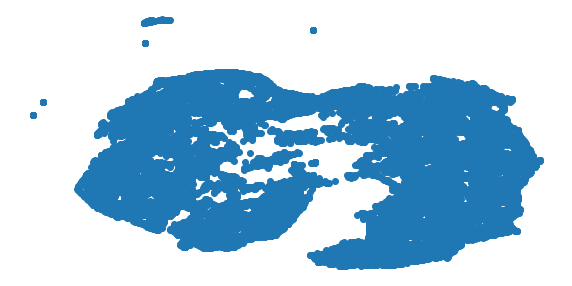

In [142]:
for min_dist in [0.01, 0.02, 0.05, 0.1 ]:
    umap_results = umap.UMAP(n_neighbors=7,
                          min_dist=min_dist,
                          metric='correlation').fit_transform(X_std)

    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    print("min_dist = {}".format(min_dist))
    plt.show()

### T-SNE

In [143]:
from sklearn.manifold import TSNE

# time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, n_jobs=-1)
tsne_results = tsne.fit_transform(X_std)

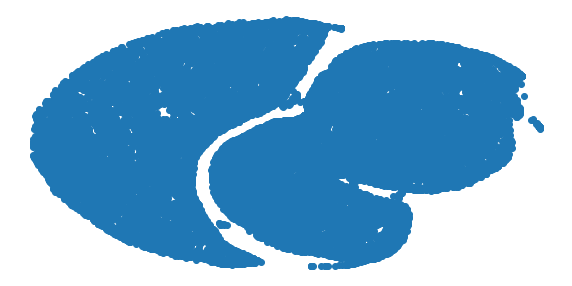

In [144]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

perplexity = 10


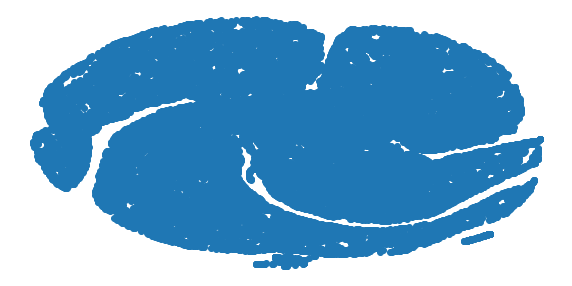

perplexity = 20


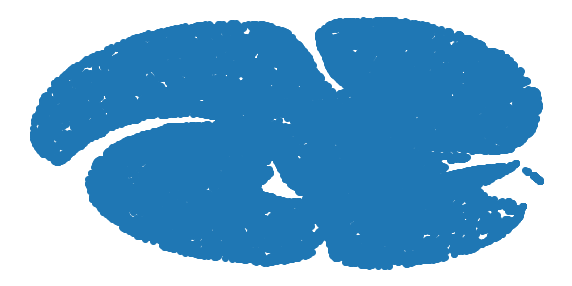

perplexity = 30


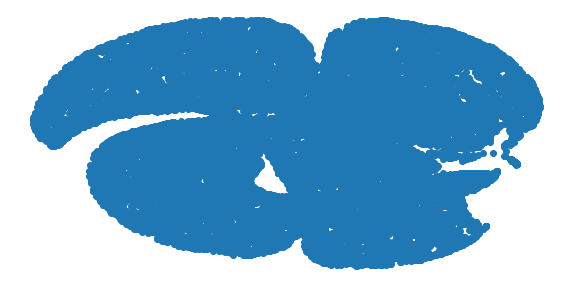

perplexity = 50


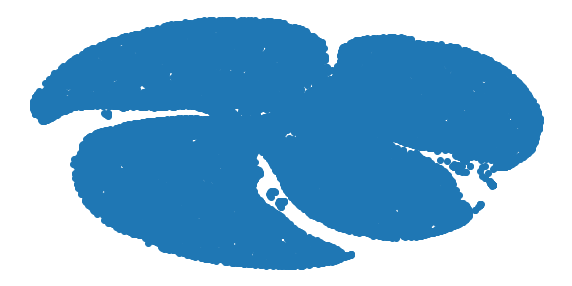

In [145]:
for perplexity in [10, 20, 30, 50 ]:
    tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300, n_jobs=-1, random_state=123)
    tsne_results = tsne.fit_transform(X_std)

    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    print("perplexity = {}".format(perplexity))
    plt.show()

### Sumary
T-SNE has the best performance to seperate the observation, while it is also the slowest one. Luckily, since the observations are not too many, using T-SNE would not be a huge burden.

# Part II- clustering techniques to group together similar observations

### K-Means

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining the k-means

for n_cluster in [3,4,5,6]:
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)

    # Fit model
    kmeans_cluster.fit(X_std)
    y_pred = kmeans_cluster.predict(X_std)

    print("cluster = {}, silhouette = {}".format(n_cluster, silhouette_score(X_std, y_pred, metric='euclidean')))
    
    

cluster = 3, silhouette = 0.3707341103807481
cluster = 4, silhouette = 0.3183989379327209
cluster = 5, silhouette = 0.35232043849740174
cluster = 6, silhouette = 0.3334511326153744


cluster = 3, silhouette = 0.3707341103807481


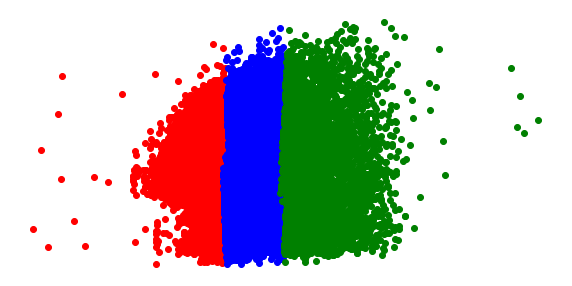

cluster = 4, silhouette = 0.3183989379327209


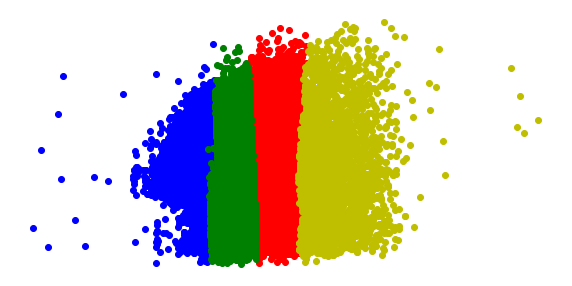

cluster = 5, silhouette = 0.35232043849740174


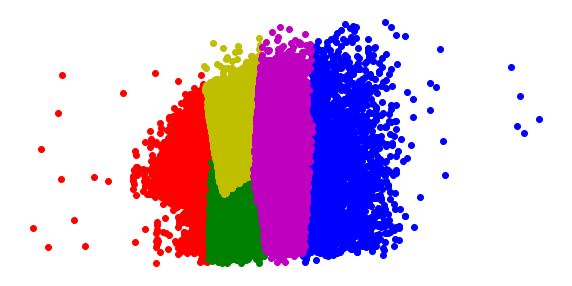

cluster = 6, silhouette = 0.3334511326153744


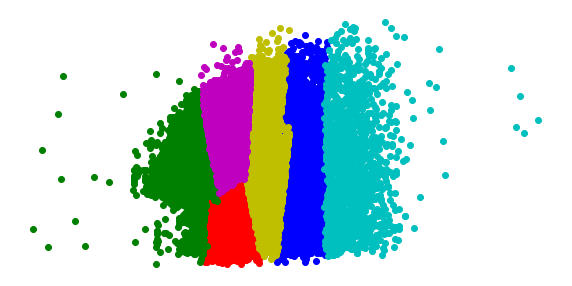

In [147]:
pca = PCA(n_components=2).fit_transform(X_std)


for n_cluster in [3,4,5,6]:
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)
    
    # Fit model
    kmeans_cluster.fit(X_std)
    y_pred = kmeans_cluster.predict(X_std)
    df_cluster = pd.concat([pd.DataFrame(pca), pd.DataFrame({'y_pred':y_pred})],axis=1)


    print("cluster = {}, silhouette = {}".format(n_cluster, silhouette_score(X_std, y_pred, metric='euclidean')))
    
    
    plt.figure(figsize=(10,5))
    colours = 'rbgymck'

    for index_cluster in range(0,n_cluster):
        plt.scatter(df_cluster[df_cluster.y_pred==index_cluster][0], df_cluster[df_cluster.y_pred==index_cluster][1], color=colours[index_cluster])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

### Since PCA didn't do a good job helping us to visualize the clusters, let's try using T-SNE

In [148]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, n_jobs=-1, random_state=123)
tsne_results = tsne.fit_transform(X_std)

cluster = 3, silhouette = 0.3707341103807481


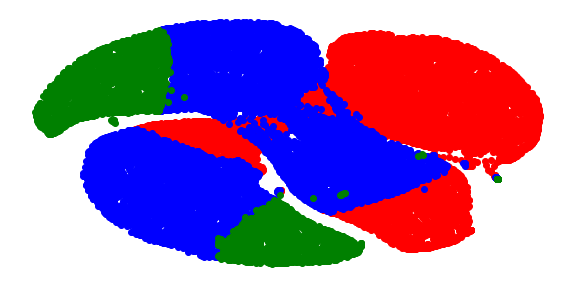

cluster = 4, silhouette = 0.3183989379327209


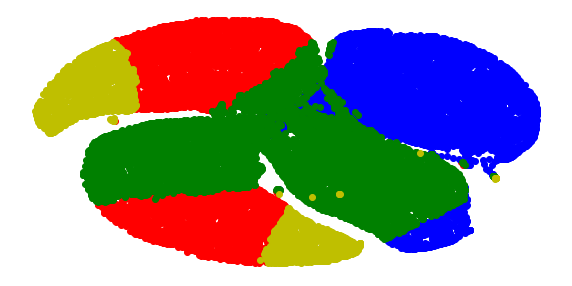

cluster = 5, silhouette = 0.35232043849740174


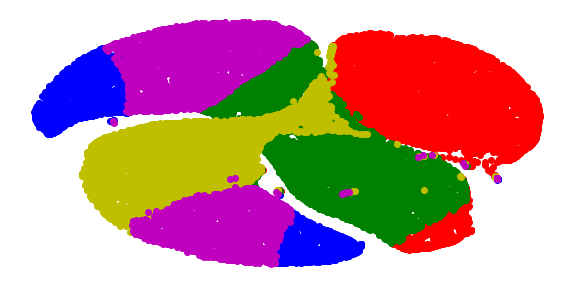

cluster = 6, silhouette = 0.3334511326153744


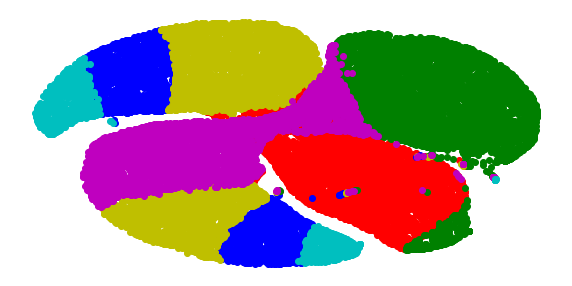

In [149]:
for n_cluster in [3,4,5,6]:
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)

    # Fit model
    kmeans_cluster.fit(X_std)
    y_pred = kmeans_cluster.predict(X_std)
    df_cluster = pd.concat([pd.DataFrame(tsne_results), pd.DataFrame({'y_pred':y_pred})],axis=1)


    print("cluster = {}, silhouette = {}".format(n_cluster, silhouette_score(X_std, y_pred, metric='euclidean')))
    
    
    plt.figure(figsize=(10,5))
    colours = 'rbgymck'

    for index_cluster in range(0,n_cluster):
        plt.scatter(df_cluster[df_cluster.y_pred==index_cluster][0], df_cluster[df_cluster.y_pred==index_cluster][1], color=colours[index_cluster])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

# GMM

In [150]:
from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score

# Defining the k-means

for n_cluster in [3,4,5,6]:
    for cov_type in ['full', 'tied', 'diag', 'spherical']:
        gmm_cluster = GaussianMixture(n_components=n_cluster, random_state=123, covariance_type=cov_type)
    #     gmm_cluster = GaussianMixture(n_components=n_cluster, random_state=123)

        # Fit model
        gmm_cluster.fit(X_std)
        y_pred = gmm_cluster.predict(X_std)

        print("cluster = {}, cov_type = {}, silhouette = {}".format(n_cluster, cov_type, silhouette_score(X_std, y_pred, metric='euclidean')))

cluster = 3, cov_type = full, silhouette = 0.25361460911606715
cluster = 3, cov_type = tied, silhouette = 0.19865595590405166
cluster = 3, cov_type = diag, silhouette = 0.31215490036963317
cluster = 3, cov_type = spherical, silhouette = 0.34977064524625395
cluster = 4, cov_type = full, silhouette = 0.1832838449481926
cluster = 4, cov_type = tied, silhouette = 0.2555913900945279
cluster = 4, cov_type = diag, silhouette = 0.2509418175624763
cluster = 4, cov_type = spherical, silhouette = 0.29143248472232336
cluster = 5, cov_type = full, silhouette = 0.1362054825569339
cluster = 5, cov_type = tied, silhouette = 0.2397612710984102
cluster = 5, cov_type = diag, silhouette = 0.19768487497949225
cluster = 5, cov_type = spherical, silhouette = 0.2733483298011522
cluster = 6, cov_type = full, silhouette = 0.20108806834207194
cluster = 6, cov_type = tied, silhouette = 0.2934790143358688
cluster = 6, cov_type = diag, silhouette = 0.27433983212940066
cluster = 6, cov_type = spherical, silhouette =

cluster = 3, silhouette = 0.34977064524625395


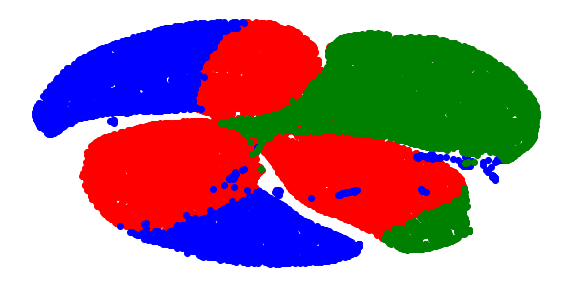

cluster = 4, silhouette = 0.29143248472232336


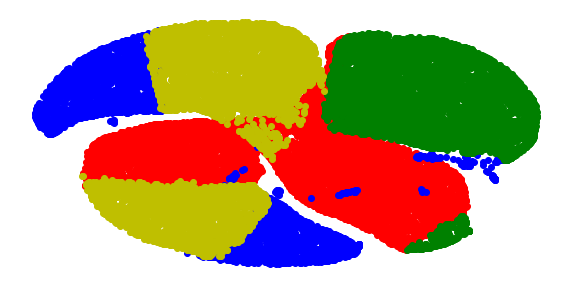

cluster = 5, silhouette = 0.2733483298011522


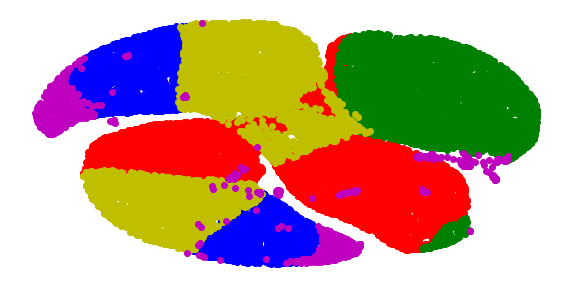

cluster = 6, silhouette = 0.30486078020119484


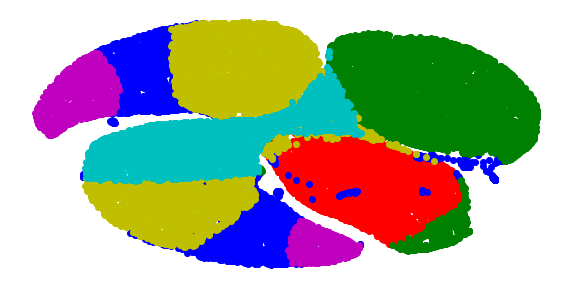

In [157]:
for n_cluster in [3,4,5,6]:
   
#     gmm_cluster = GaussianMixture(n_components=n_cluster, random_state=123)
    gmm_cluster = GaussianMixture(n_components=n_cluster, random_state=123, covariance_type='spherical')

    # Fit model
    gmm_cluster.fit(X_std)
    y_pred = gmm_cluster.predict(X_std)
    df_cluster = pd.concat([pd.DataFrame(tsne_results), pd.DataFrame({'y_pred':y_pred})],axis=1)


    print("cluster = {}, silhouette = {}".format(n_cluster, silhouette_score(X_std, y_pred, metric='euclidean')))
    
    
    plt.figure(figsize=(10,5))
    colours = 'rbgymck'

    for index_cluster in range(0,n_cluster):
        plt.scatter(df_cluster[df_cluster.y_pred==index_cluster][0], df_cluster[df_cluster.y_pred==index_cluster][1], color=colours[index_cluster])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

#### It seems K-Means has better performance. As in the silhoutte score and in consistent with T-SNE visualization. We will pick cluster K as 4, and analyze the distribution across gender and age.

### Analysis

In [180]:
kmeans_cluster = KMeans(n_clusters=4, random_state=123)
# Fit model
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
#reorder
y_pred = np.array([2 if x == 0 
                   else 0 if x==1 
                   else 1 if x==2
#                    else 3 if x==3
#                    else 4 if x==4
                   else 3 
                   for x in y_pred])

df['y_pred']=y_pred
df.y_pred.value_counts(sort=False)

0     7061
1    10237
2     6540
3     2760
Name: y_pred, dtype: int64

### pie chart analysis
As Marathon organizers, we probably want the number of runners in each clusters are balanced. So that we don't have to prepare a lot of  refreshment for certain cluster but only a little for the other one.
It seems like the size of clusters are in the same scale.

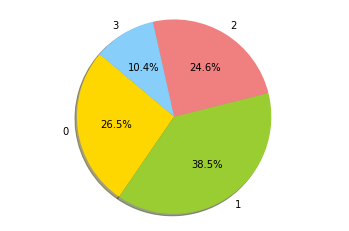

0     7061
1    10237
2     6540
3     2760
Name: y_pred, dtype: int64


In [182]:
# labels = ['0', '1', '2', '3', '4', '5']
# sizes = list(df.y_pred.value_counts(sort=False).values)
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'r', 'g']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

labels = ['0', '1', '2','3']
sizes = list(df.y_pred.value_counts(sort=False).values)
colors = ['gold', 'yellowgreen', 'lightcoral','lightskyblue']

# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

print(df.y_pred.value_counts(sort=False))

### Running speed analysis
- As mentioned before, the organizer do not like all the runners rush to the same refreshment location at the same time, so that the volunteers can help with best effort. Or more people can get better pictures, assuming there are limited photographers at limited locations. To achieve that, we are hoping the running speed in each clusters are similar, while some gap exist outside the clsuters.
- I reorganized the labels of each clusters, so that the average speed of each cluster are from fast to slow as "0" to "3".
- When using barplot and boxplot, we can see that, in each cluster, the variance is small, while there is enough gap between clusters. That's what we want.
- Even though there exist outliers, i.e. at some point runners in cluster "0" ran slower than runners in cluster "3". But it is not too bad since it doesn't mean those people cannot get services.

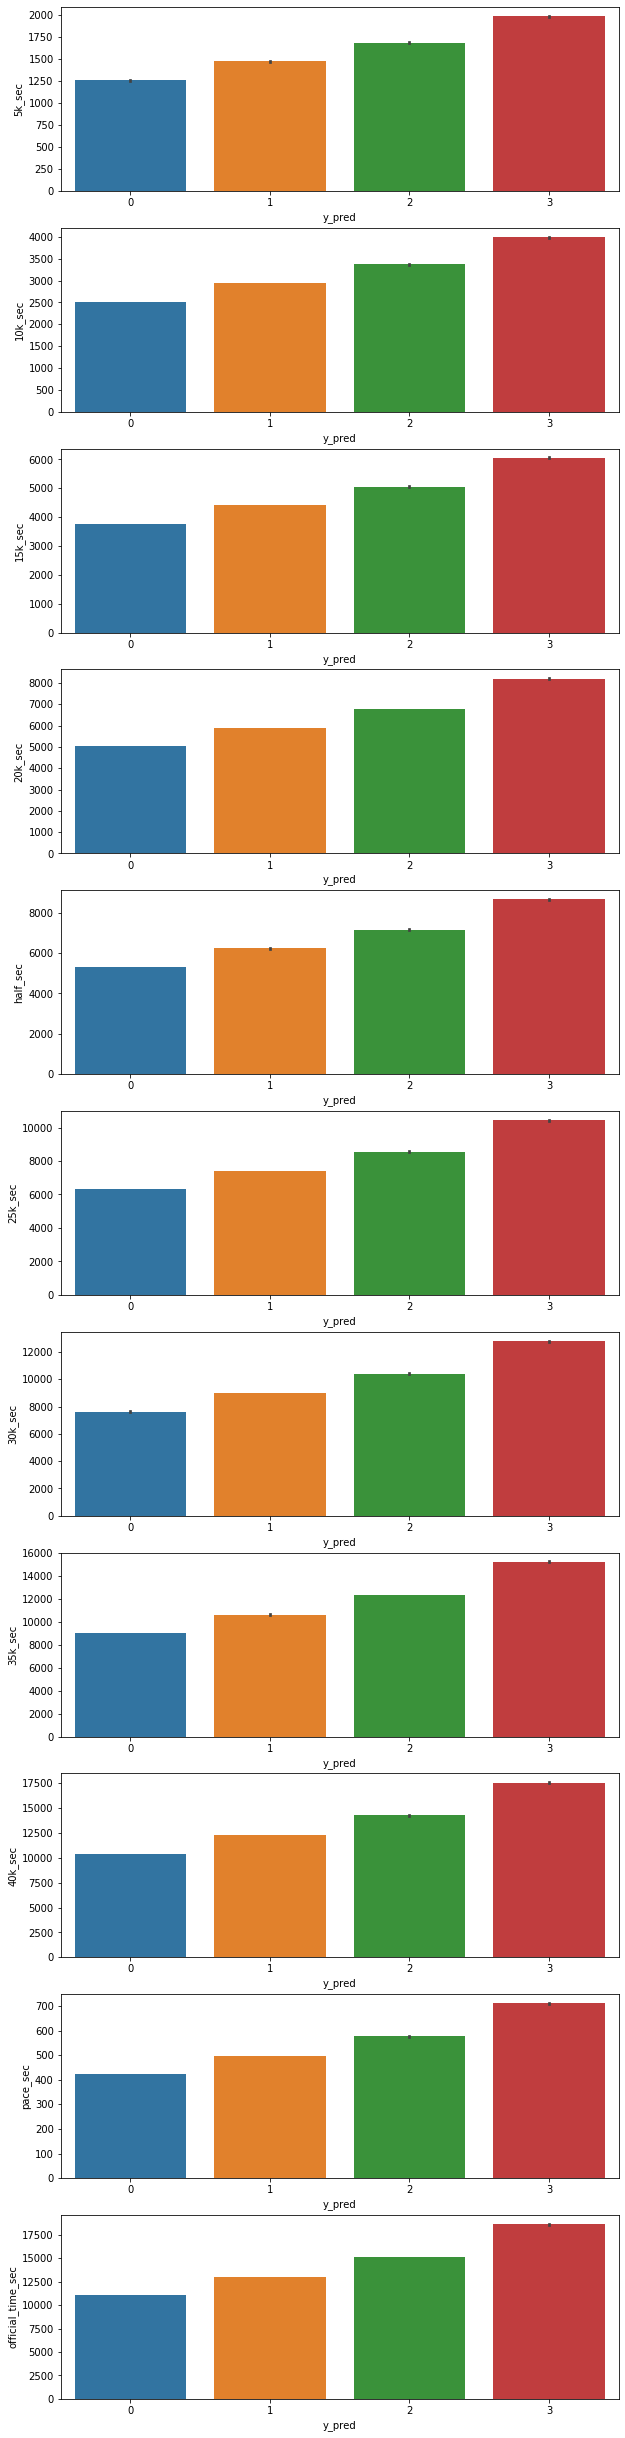

In [176]:
col_secs = ['5k_sec', '10k_sec', '15k_sec', '20k_sec', 'half_sec', \
            '25k_sec', '30k_sec', '35k_sec', '40k_sec', 'pace_sec', 'official_time_sec']
plt.figure(figsize=(10,44))
for index,col in enumerate(col_secs):
    plt.subplot(11,1,index+1)
#     sns.boxplot(y=col, x='y_pred', data=df)
    sns.barplot(y=col, x='y_pred', data=df)

    

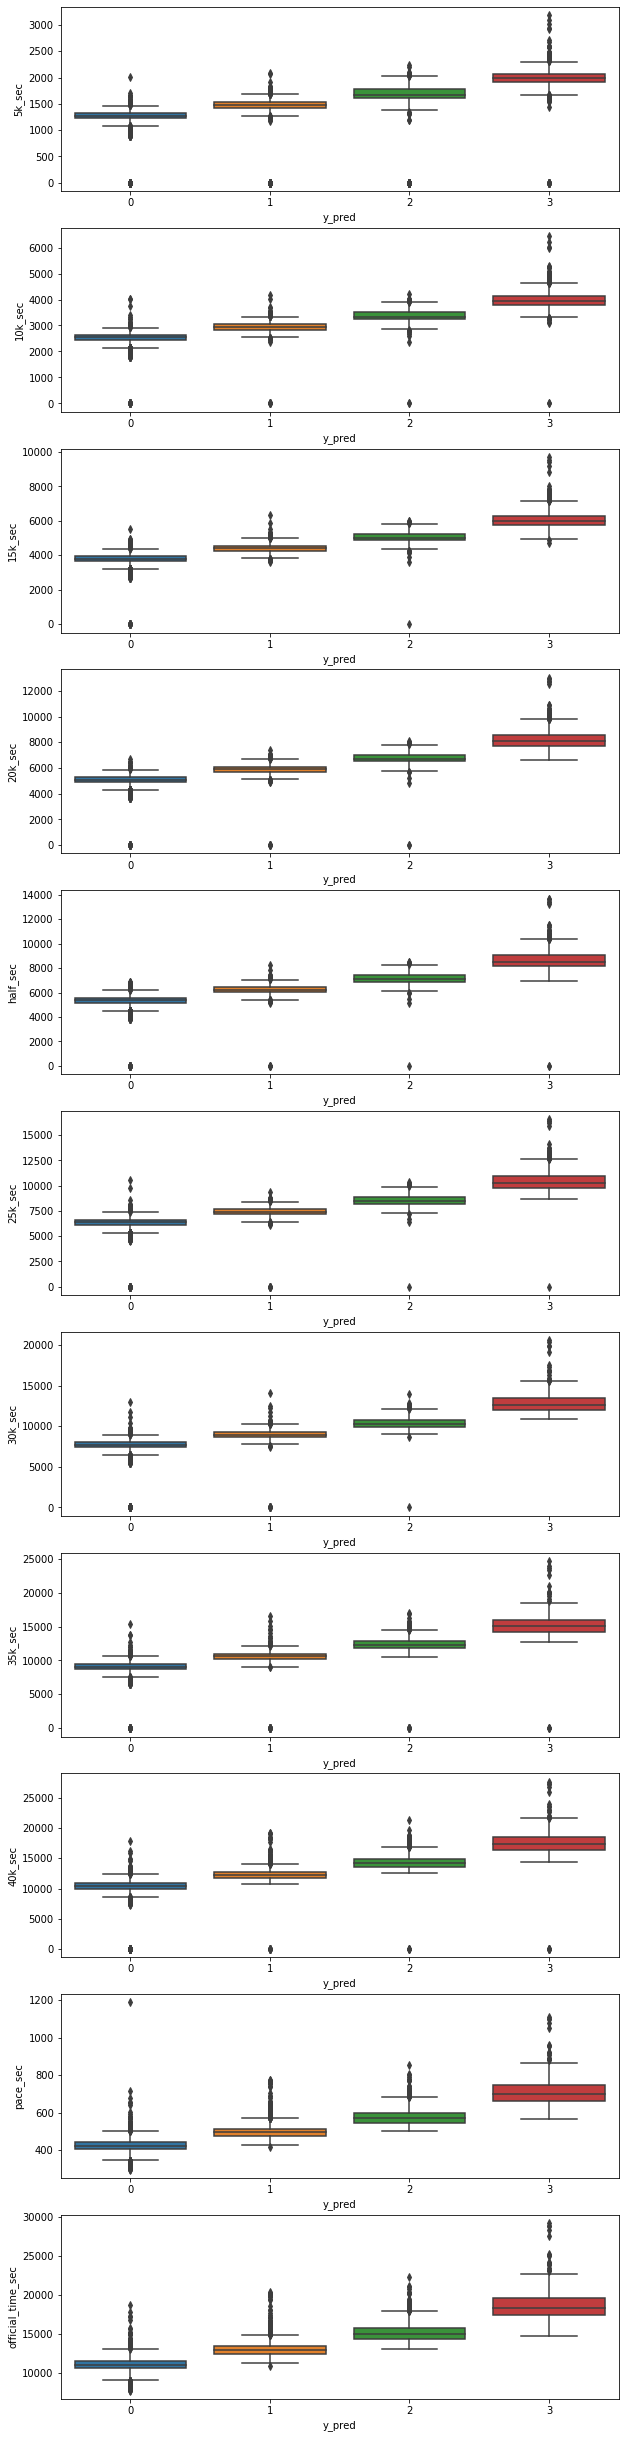

In [183]:
col_secs = ['5k_sec', '10k_sec', '15k_sec', '20k_sec', 'half_sec', \
            '25k_sec', '30k_sec', '35k_sec', '40k_sec', 'pace_sec', 'official_time_sec']
plt.figure(figsize=(10,44))
for index,col in enumerate(col_secs):
    plt.subplot(11,1,index+1)
    sns.boxplot(y=col, x='y_pred', data=df)
#     sns.barplot(y=col, x='y_pred', data=df)

### Gender and age distribution
- There is a vague trend that as the age increase, people would be assigned to cluster with higer number (slower group). But this is just a vague trend, since there is overlap of age between each clusters. Also the median age of the cluster "3" is the second yougest, while cluster "3" is supposed to be slow group.
- The proportion of male runners is very high in cluster 0, while for the rest of the clusters runner genders are even. We would probably expect the toilet occupacy ratio of male over female is consistent most of the time.

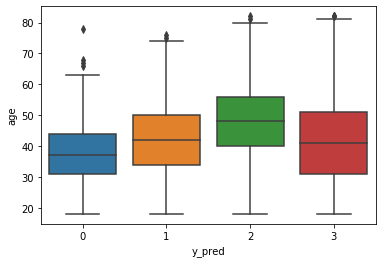

In [177]:
sns.boxplot(y='age', x='y_pred', data=df)

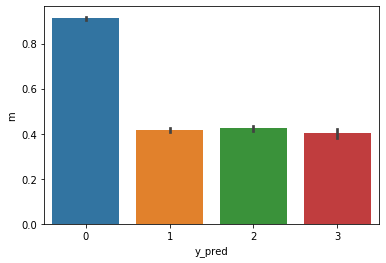

In [178]:
df['m'] = df_dummy
sns.barplot(y='m', x='y_pred', data=df)

# Summary
- In this challenge, we conducted a brief unsupervised learning case by studying 2017 Boston Marathon result. To be more specifically, we performed dimenionality reduction for visualization and clustering.
- The result might help organizer to better prepare an event so that the participants would have a nice marathon experience.